In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df_bio = pd.read_csv('biometric.csv')

## Aadhaar Lifecycle Risk Index

In [ ]:
df_bio.head()

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,haryana,mahendragarh,123029,280,577,2025,3,1
1,bihar,madhepura,852121,144,369,2025,3,1
2,jammu and kashmir,punch,185101,643,1091,2025,3,1
3,bihar,bhojpur,802158,256,980,2025,3,1
4,tamil nadu,madurai,625514,271,815,2025,3,1


In [ ]:
df_bio.head()

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,haryana,mahendragarh,123029,280,577,2025,3,1
1,bihar,madhepura,852121,144,369,2025,3,1
2,jammu and kashmir,punch,185101,643,1091,2025,3,1
3,bihar,bhojpur,802158,256,980,2025,3,1
4,tamil nadu,madurai,625514,271,815,2025,3,1


## EDA

##### Reusable Functions

In [55]:
def histogram(df,col1,col2,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.countplot(data=df , x =df[col1] , hue=df[col2])
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()


def barplot(df,col1,col2,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.barplot(data = df , x = col1 , y=col2)
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()


def scatterplot(df,col1,col2,xlabel , ylabel):
     plt.figure(figsize=(15,8))
     sns.scatterplot(data = df , x = col1 , y=col2)
     plt.xlabel(f"{xlabel}")
     plt.ylabel(f"{ylabel}")
     plt.xticks(rotation = 45)
     plt.show()
     plt.tight_layout()

def boxplot(df,col,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.boxplot(data=df , x =df[col])
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()

def heatmap(df):
    plt.figure(figsize=(15,10))
    sns.set_style("darkgrid")
    sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='coolwarm')
    plt.show()
    plt.tight_layout()

def kde(df,col1,xlabel , ylabel):
    plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.kdeplot(data=df , x =df[col1])
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.xticks(rotation = 90)
    plt.show()
    plt.tight_layout()

In [ ]:
df_bio.head()   

,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,haryana,mahendragarh,123029,280,577,2025,3,1
1,bihar,madhepura,852121,144,369,2025,3,1
2,jammu and kashmir,punch,185101,643,1091,2025,3,1
3,bihar,bhojpur,802158,256,980,2025,3,1
4,tamil nadu,madurai,625514,271,815,2025,3,1


In [ ]:
df_copy = df_bio.copy()

In [8]:
df_copy['total_biometric_age'] = df_copy['bio_age_5_17'] + df_copy['bio_age_17_']


## Which states generate the highest total biometric authentication demand?

### Gujarat , Maharastra , Madhya Pradesh , Bihar , Uttar Pradesh , Tamil Nadu , Rajasthan , Andhra Pradesh , Karnataka , West Bengal Generate the Most Demand and 
### Puducherry , sikkim , Daman and Diu and Dadra and Nagar Haveli , Andaman and Nicobar Islands , Lakshadweep , Ladakh , Jammu Kashmir , Chandigarh , Arunachal pradesh , Goa Generate Least Demand


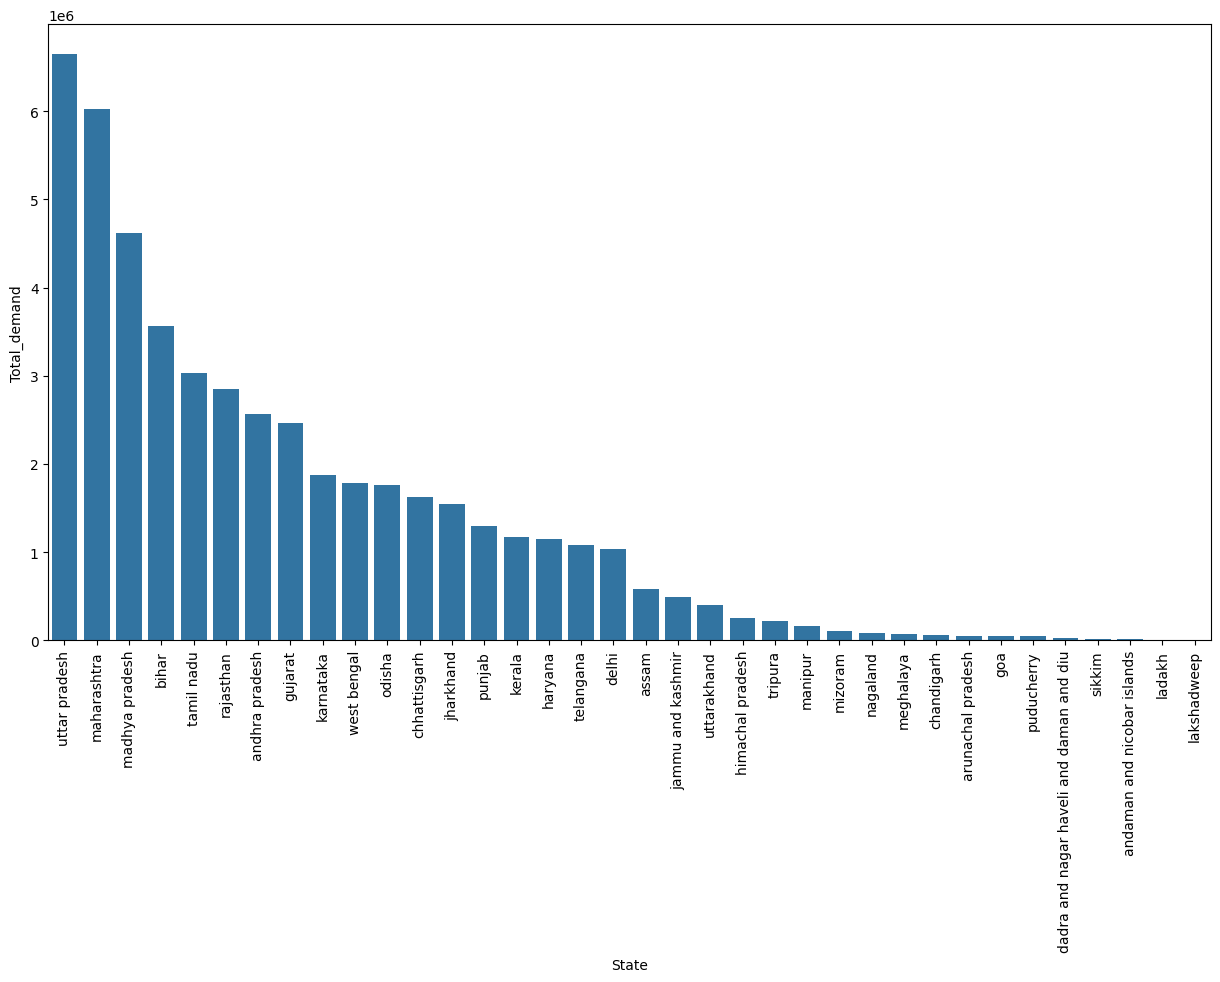

<Figure size 640x480 with 0 Axes>

In [9]:
df_total_bio_demand = df_copy.groupby('state')['total_biometric_age'].sum().sort_values(ascending=False).reset_index()
barplot(df_total_bio_demand , 'state' , 'total_biometric_age' , 'State' , 'Total_demand')

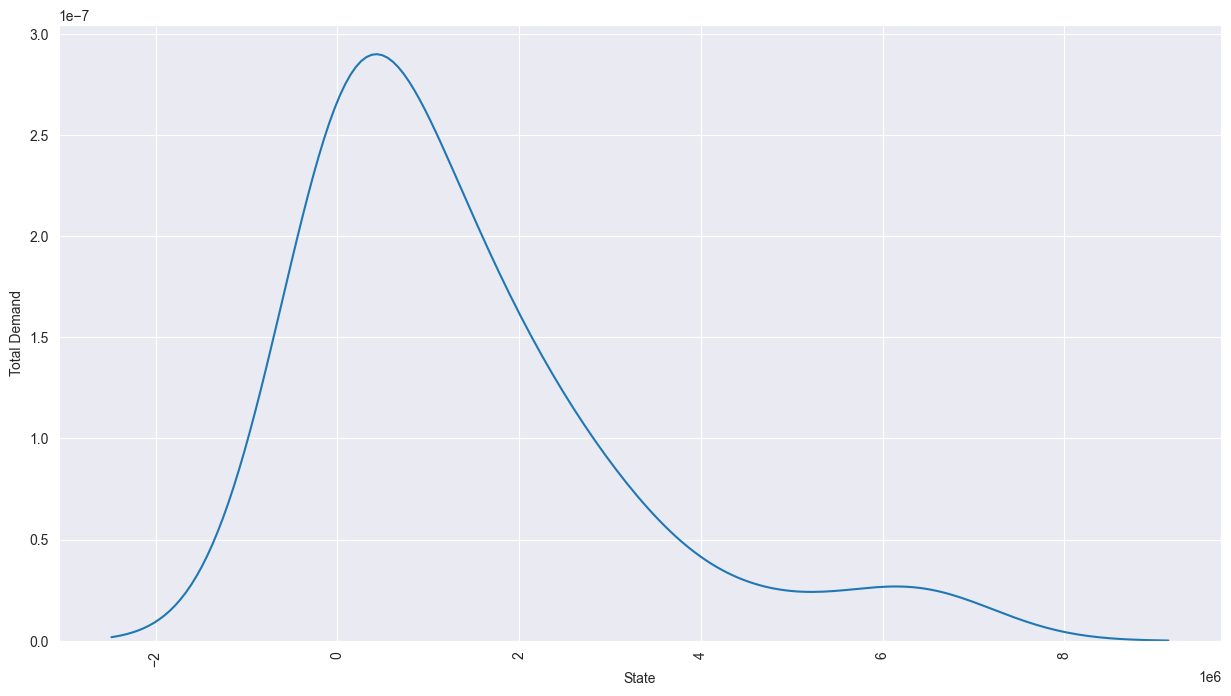

<Figure size 640x480 with 0 Axes>

In [56]:
kde(df_total_bio_demand , "total_biometric_age" , "State" , "Total Demand")

In [10]:
df_total_bio_demand

,state,total_biometric_age
0,uttar pradesh,6654783
1,maharashtra,6026314
2,madhya pradesh,4619257
3,bihar,3559921
4,tamil nadu,3028192
5,rajasthan,2850587
6,andhra pradesh,2569318
7,gujarat,2459996
8,karnataka,1877706
9,west bengal,1782766


In [11]:
df_total_bio_demand.head(10)

,state,total_biometric_age
0,uttar pradesh,6654783
1,maharashtra,6026314
2,madhya pradesh,4619257
3,bihar,3559921
4,tamil nadu,3028192
5,rajasthan,2850587
6,andhra pradesh,2569318
7,gujarat,2459996
8,karnataka,1877706
9,west bengal,1782766


In [12]:
df_total_bio_demand.tail(10)

,state,total_biometric_age
26,meghalaya,66880
27,chandigarh,62840
28,arunachal pradesh,47014
29,goa,46436
30,puducherry,44980
31,dadra and nagar haveli and daman and diu,30335
32,sikkim,18306
33,andaman and nicobar islands,14722
34,ladakh,4159
35,lakshadweep,3326


### Which districts show consistently low Aadhaar enrollment for children (0–17)?

In [15]:
df_enrollment = pd.read_csv('enrollment.csv')
df_enrollment.head()

,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day
0,meghalaya,east khasi hills,793121,11,61,37,2025,3,2
1,karnataka,bengaluru urban,560043,14,33,39,2025,3,9
2,uttar pradesh,kanpur nagar,208001,29,82,12,2025,3,9
3,uttar pradesh,aligarh,202133,62,29,15,2025,3,9
4,karnataka,bengaluru urban,560016,14,16,21,2025,3,9


In [23]:
df_enrollment_copy = df_enrollment.copy()

In [27]:
df_enrollment_copy['total_minor_age'] = df_enrollment_copy['age_0_5'] + df_enrollment_copy['age_5_17']
df_enrollment_copy.drop(columns=['age_0_5' , 'age_5_17' , 'age_18_greater'],axis=1 , inplace=True)
df_enrollment_copy.head()

,state,district,pincode,year,month,day,total_minor_age
0,meghalaya,east khasi hills,793121,2025,3,2,72
1,karnataka,bengaluru urban,560043,2025,3,9,47
2,uttar pradesh,kanpur nagar,208001,2025,3,9,111
3,uttar pradesh,aligarh,202133,2025,3,9,91
4,karnataka,bengaluru urban,560016,2025,3,9,30


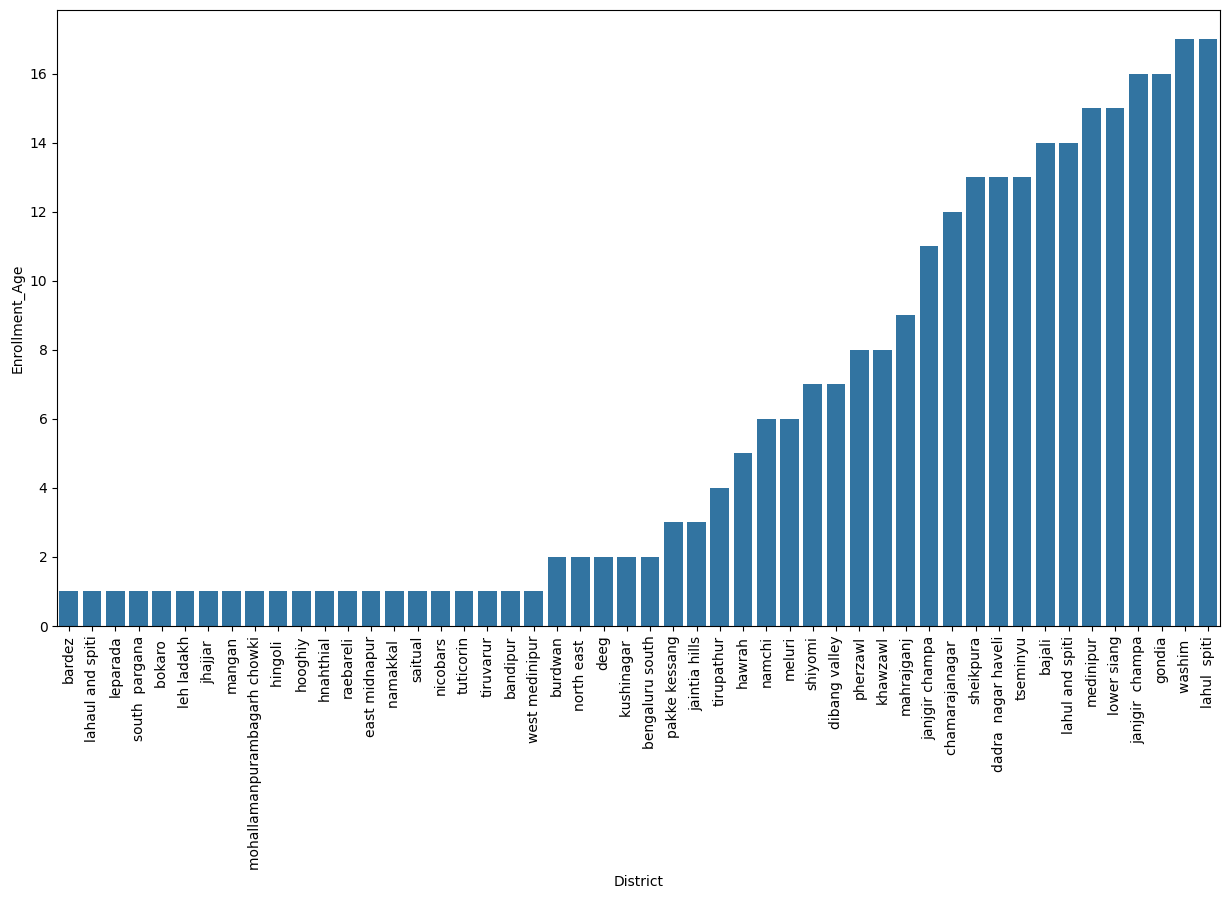

<Figure size 640x480 with 0 Axes>

In [ ]:
df_low_enroll_minors = df_enrollment_copy.groupby('district')['total_minor_age'].sum().sort_values(ascending=True).reset_index()
barplot(df_low_enroll_minors.head(50) , "district" ,"total_minor_age","District","Enrollment_Age")

### bardez , lahul and spiti , leprada , south pargana , bokaro , leh ladakh , jhajjar , mangan , raebareily , nicobars , tuticorin and many more are the districts having low enrollment of children 

### uttar dinjapur , east khasi hills , bengaluru , gaya , hardoi , jaipur , bareily , hyderabad , bengaluru urban are among the districts wth high enrollment of children

In [43]:
df_low_enroll_minors.head(30)

,district,total_minor_age
0,bardez,1
1,lahaul and spiti,1
2,leparada,1
3,south pargana,1
4,bokaro,1
5,leh ladakh,1
6,jhajjar,1
7,mangan,1
8,mohallamanpurambagarh chowki,1
9,hingoli,1


In [46]:
df_low_enroll_minors.tail(20)

,district,total_minor_age
928,uttar dinajpur,17461
929,east khasi hills,17556
930,bengaluru,17790
931,gaya,17805
932,hardoi,17869
933,jaipur,17981
934,east champaran,18211
935,bareilly,18790
936,shahjahanpur,19038
937,hyderabad,19217
